# Homework 1 - Exercise 1

### Name : Emma Parois

In [1]:
import numpy as np

In [3]:
def sign(x):
    return 1*(x >= 0) - 1*(x < 0)

In [4]:
class HopfiedlNetwork:
    
    def __init__(self, p, N):
        self.p = p
        self.N = N
        self.U = np.zeros((N, p))
        self.W = np.zeros((N, N))
        self.S = np.zeros(N)
        
    def store_patterns(self, U, w_diag_zero=True):
        self.U = U
        self.W = 1/self.N * self.U @ self.U.T
        if w_diag_zero:
            np.fill_diagonal(self.W, 0)
    
    def feed_pattern(self, x):
        self.S = np.copy(x)
    
    def retrieve_undistorted_pattern(self):
        self._update_rule()
        return self.S
    
    def _update_rule(self):
        idx = np.random.randint(self.N)
        self.S[idx] = sign(self.W[idx,:] @ self.S)     

In [5]:
P = np.array([12,24,48,70,100,120])

In [6]:
N = 120

In [7]:
nb_trials = 100000

#### Generate p patterns of size N

In [8]:
def generate_patterns(p, N):
    return np.random.choice([-1, 1], size=(N, p), p=[0.5, 0.5])

### Question 1

#### Calculate errors

In [9]:
err = np.zeros(P.shape[0])

In [10]:
for idx, p in enumerate(P):
    for i in range(nb_trials):
        patterns = generate_patterns(p, N)
        net = HopfiedlNetwork(p, N)
        net.store_patterns(patterns)
        rand_idx = np.random.randint(p)
        net.feed_pattern(patterns[:,rand_idx])
        undistorted_pattern = net.retrieve_undistorted_pattern()
        if not (patterns[:,rand_idx] == undistorted_pattern).all():
            err[idx] += 1
    err[idx] /= nb_trials
    print('p = ', p)

p =  12
p =  24
p =  48
p =  70
p =  100
p =  120


In [11]:
err

array([0.00053, 0.01162, 0.05526, 0.09332, 0.13609, 0.15907])

#### Check against theory

In [12]:
from scipy import special

In [13]:
err_theory = 1/2*(1-special.erf(np.sqrt(N/(2*P))))

### Question 2

#### Calculate errors

In [14]:
err_diag_non_zero = np.zeros(P.shape[0])

In [15]:
for idx, p in enumerate(P):
    for i in range(nb_trials):
        patterns = generate_patterns(p, N)
        net = HopfiedlNetwork(p, N)
        net.store_patterns(patterns, w_diag_zero=False)
        rand_idx = np.random.randint(p)
        net.feed_pattern(patterns[:,rand_idx])
        undistorted_pattern = net.retrieve_undistorted_pattern()
        if not (patterns[:,rand_idx] == undistorted_pattern).all():
            err_diag_non_zero[idx] += 1
    err_diag_non_zero[idx] /= nb_trials
    print('p = ', p)

p =  12
p =  24
p =  48
p =  70
p =  100
p =  120


In [16]:
err_diag_non_zero

array([0.00013, 0.00316, 0.012  , 0.01766, 0.02235, 0.02284])

#### Plot errors

In [17]:
import matplotlib.pyplot as plt

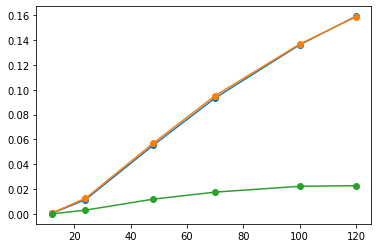

In [18]:
plt.plot(P, err, '-o')
plt.plot(P, err_theory, '-o')
plt.plot(P, err_diag_non_zero, '-o')